### Library import

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm
from math import pi, ceil
import seaborn as sns
sns.set();
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})


import seaborn as sns
sns.set;

from sklearn import preprocessing

### DATA READING AND LOADING

In [2]:
jaam_clusters = pd.read_csv('/Users/jordi.hs/Desktop/jaam_clusters').drop(['id'], axis=1)
print(jaam_clusters.shape)
jaam_clusters.head()

(200, 12)


cluster  acousticness  danceability  energy  instrumentalness  key  \
0        5      0.000973         0.653   0.934          0.000512    7   
1        5      0.010700         0.764   0.620          0.000005    5   
2        1      0.039700         0.494   0.698          0.006340    6   
3        0      0.166000         0.229   0.500          0.000248    4   
4        5      0.102000         0.547   0.836          0.000000    6   

   liveness  loudness  mode  speechiness    tempo  valence  
0    0.1440    -2.878     1       0.2950  127.029    0.561  
1    0.0968    -5.757     0       0.1840  129.989    0.526  
2    0.1520   -12.049     0       0.0553   95.842    0.778  
3    0.4540    -6.769     1       0.0312   96.022    0.185  
4    0.1830    -5.361     0       0.1880  104.985    0.649

#### Preprocessing

* In order to be able to analyze what each cluster represents we should make sure that the values from all variables are comparable.

To achieve that, we will normalize the features 'key' 'tempo' and 'loudness' which values do not range from 0 to 1.

In [3]:
correct_features = jaam_clusters.drop(['key', 'tempo', 'loudness'], axis=1)

In [4]:
features_to_sc = jaam_clusters[['key', 'tempo', 'loudness']]
#features_to_sc = jaam_clusters.drop(['cluster', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'mode', 'speechiness', 'valence'], axis=1)
features_to_sc.head()

key    tempo  loudness
0    7  127.029    -2.878
1    5  129.989    -5.757
2    6   95.842   -12.049
3    4   96.022    -6.769
4    6  104.985    -5.361

In [5]:
scaler = preprocessing.MinMaxScaler()

In [6]:
sc_features = features_to_sc.copy()
sc_features[['key', 'tempo', 'loudness']] = scaler.fit_transform(sc_features[['key', 'tempo', 'loudness']])
sc_features.head()

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


key     tempo  loudness
0  0.636364  0.470934  0.892844
1  0.454545  0.491793  0.679347
2  0.545455  0.251150  0.212755
3  0.363636  0.252419  0.604301
4  0.545455  0.315584  0.708713

In [7]:
jaam_clusters_adj = pd.concat([correct_features, sc_features], axis=1)
jaam_clusters_adj.head()

cluster  acousticness  danceability  energy  instrumentalness  liveness  \
0        5      0.000973         0.653   0.934          0.000512    0.1440   
1        5      0.010700         0.764   0.620          0.000005    0.0968   
2        1      0.039700         0.494   0.698          0.006340    0.1520   
3        0      0.166000         0.229   0.500          0.000248    0.4540   
4        5      0.102000         0.547   0.836          0.000000    0.1830   

   mode  speechiness  valence       key     tempo  loudness  
0     1       0.2950    0.561  0.636364  0.470934  0.892844  
1     0       0.1840    0.526  0.454545  0.491793  0.679347  
2     0       0.0553    0.778  0.545455  0.251150  0.212755  
3     1       0.0312    0.185  0.363636  0.252419  0.604301  
4     0       0.1880    0.649  0.545455  0.315584  0.708713

#### One last step

To proceed with the analysis we are going to take the mean of each feature in each cluster.

In [8]:
df_radar = jaam_clusters_adj.groupby('cluster').mean().reset_index()
df_radar

cluster  acousticness  danceability    energy  instrumentalness  liveness  \
0        0      0.084673      0.565038  0.752346          0.027691  0.429462   
1        1      0.118285      0.688614  0.779514          0.009491  0.148583   
2        2      0.160107      0.736542  0.494958          0.822292  0.099567   
3        3      0.408044      0.583000  0.496971          0.022220  0.110659   
4        4      0.158598      0.529407  0.750074          0.013764  0.133452   
5        5      0.176015      0.625789  0.762895          0.000027  0.143995   

       mode  speechiness   valence       key     tempo  loudness  
0  0.461538     0.076027  0.366369  0.573427  0.393582  0.689470  
1  0.657143     0.061830  0.696514  0.527273  0.350975  0.709724  
2  0.541667     0.061738  0.213812  0.450758  0.430427  0.284217  
3  0.852941     0.038265  0.334006  0.465241  0.335276  0.485792  
4  0.777778     0.071778  0.564481  0.299663  0.748810  0.708345  
5  0.526316     0.264263  0.606526  0.636364  0.423761  0.732830

### What's the best way to visualize our clusters?

* We will create a single radar chart that contains all 6 clusters 

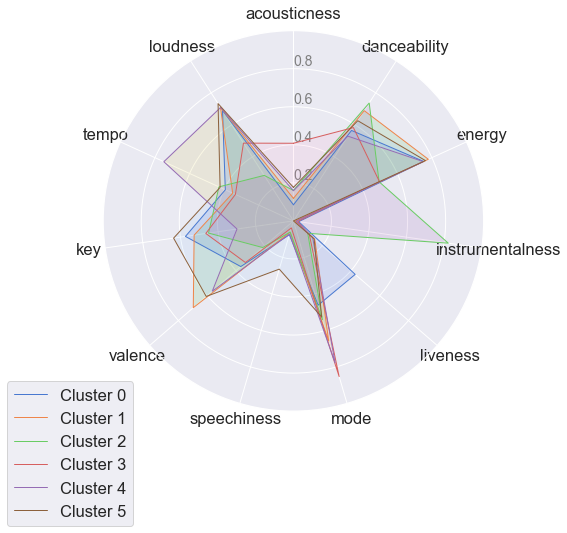

In [9]:
# number of variable
categories2=list(df_radar)[1:]
N = len(categories2)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

fig1 = plt.figure(figsize=(7, 7))
ax = fig1.add_subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories2)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([0.2,0.4,0.6,0.8], ["0.2","0.4","0.6","0.8"], color="grey", size=14)
plt.ylim(0,1)


# Ind1
values=df_radar.loc[0].drop('cluster').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label='Cluster 0')
ax.fill(angles, values, 'xkcd:blue', alpha=0.1)
 
# Ind2
values=df_radar.loc[1].drop('cluster').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Cluster 1")
ax.fill(angles, values, 'xkcd:green', alpha=0.1)

# Ind3
values=df_radar.loc[2].drop('cluster').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Cluster 2")
ax.fill(angles, values, 'xkcd:purple', alpha=0.1)

# Ind4
values=df_radar.loc[3].drop('cluster').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Cluster 3")
ax.fill(angles, values, 'xkcd:pink', alpha=0.1)

# Ind5
values=df_radar.loc[4].drop('cluster').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Cluster 4")
ax.fill(angles, values, 'xkcd:mustard', alpha=0.1)

# Ind6
values=df_radar.loc[5].drop('cluster').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Cluster 5")
ax.fill(angles, values, 'xkcd:sky blue', alpha=0.1)
 
# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1));

### What's the cornerstone of each cluster?

* Let's take a look at what which features stand out and make each cluster unique as well as the assignment of their new labels.

In [10]:
df_cstones = df_radar.copy()

In [11]:
list_feats = df_cstones.columns[1:]
for column in list_feats:
    df_cstones.loc[df_cstones[column] < df_cstones[column].max(), column] = 0


In [12]:
df_cstones

cluster  acousticness  danceability    energy  instrumentalness  liveness  \
0        0      0.000000      0.000000  0.000000          0.000000  0.429462   
1        1      0.000000      0.000000  0.779514          0.000000  0.000000   
2        2      0.000000      0.736542  0.000000          0.822292  0.000000   
3        3      0.408044      0.000000  0.000000          0.000000  0.000000   
4        4      0.000000      0.000000  0.000000          0.000000  0.000000   
5        5      0.000000      0.000000  0.000000          0.000000  0.000000   

       mode  speechiness   valence       key    tempo  loudness  
0  0.000000     0.000000  0.000000  0.000000  0.00000   0.00000  
1  0.000000     0.000000  0.696514  0.000000  0.00000   0.00000  
2  0.000000     0.000000  0.000000  0.000000  0.00000   0.00000  
3  0.852941     0.000000  0.000000  0.000000  0.00000   0.00000  
4  0.000000     0.000000  0.000000  0.000000  0.74881   0.00000  
5  0.000000     0.264263  0.000000  0.636364  0.00000   0.73283

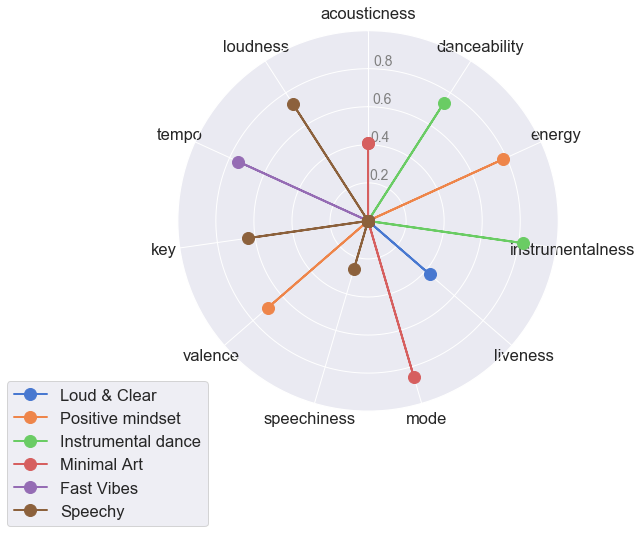

In [13]:
# number of variable
categories2=list(df_cstones)[1:]
N = len(categories2)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

fig1 = plt.figure(figsize=(7, 7))
ax = fig1.add_subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories2)
 
# Draw ylabels
ax.set_rlabel_position(2)
plt.yticks([0.2,0.4,0.6,0.8], ["0.2","0.4","0.6","0.8"], color="grey", size=14)
plt.ylim(0,1)


# Ind1
values=df_cstones.loc[0].drop('cluster').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=2, linestyle='solid', marker='o', markersize=12, label='Loud & Clear')
ax.fill(angles, values, 'xkcd:blue', alpha=0.1)
 
# Ind2
values=df_cstones.loc[1].drop('cluster').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=2, linestyle='solid', marker='o', markersize=12, label="Positive mindset")
ax.fill(angles, values, 'xkcd:green', alpha=0.1)

# Ind3
values=df_cstones.loc[2].drop('cluster').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=2, linestyle='solid', marker='o', markersize=12, label="Instrumental dance")
ax.fill(angles, values, 'xkcd:purple', alpha=0.1)

# Ind4
values=df_cstones.loc[3].drop('cluster').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=2, linestyle='solid', marker='o', markersize=12, label="Minimal Art")
ax.fill(angles, values, 'xkcd:pink', alpha=0.1)

# Ind5
values=df_cstones.loc[4].drop('cluster').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=2, linestyle='solid', marker='o', markersize=12, label="Fast Vibes")
ax.fill(angles, values, 'xkcd:mustard', alpha=0.1)

# Ind6
values=df_cstones.loc[5].drop('cluster').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=2, linestyle='solid', marker='o', markersize=12, label="Speechy")
ax.fill(angles, values, 'xkcd:sky blue', alpha=0.1)
 
# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1));

### Unique clusters require separate representations

* Now that we can call each cluster by its name we will plot them separately for a clean visualization 

In [14]:
def make_radar(row, title, color, dframe, num_clusters):
    # number of variable
    categories=list(dframe)[1:]
    N = len(categories)
    
    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
    
    # Initialise the radar plot
    ax = plt.subplot(2,ceil(num_clusters/2),row+1, polar=True, )
    
    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=14)

    # Draw ylabels
    ax.set_rlabel_position(0)
    
    plt.yticks([0.2,0.4,0.6,0.8], ["0.2","0.4","0.6","0.8"], color="grey", size=14)
    plt.ylim(0,1)

    # Ind1
    values=dframe.loc[row].drop('cluster').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)

    plt.title(title, size=16, color=color, y=1.06)

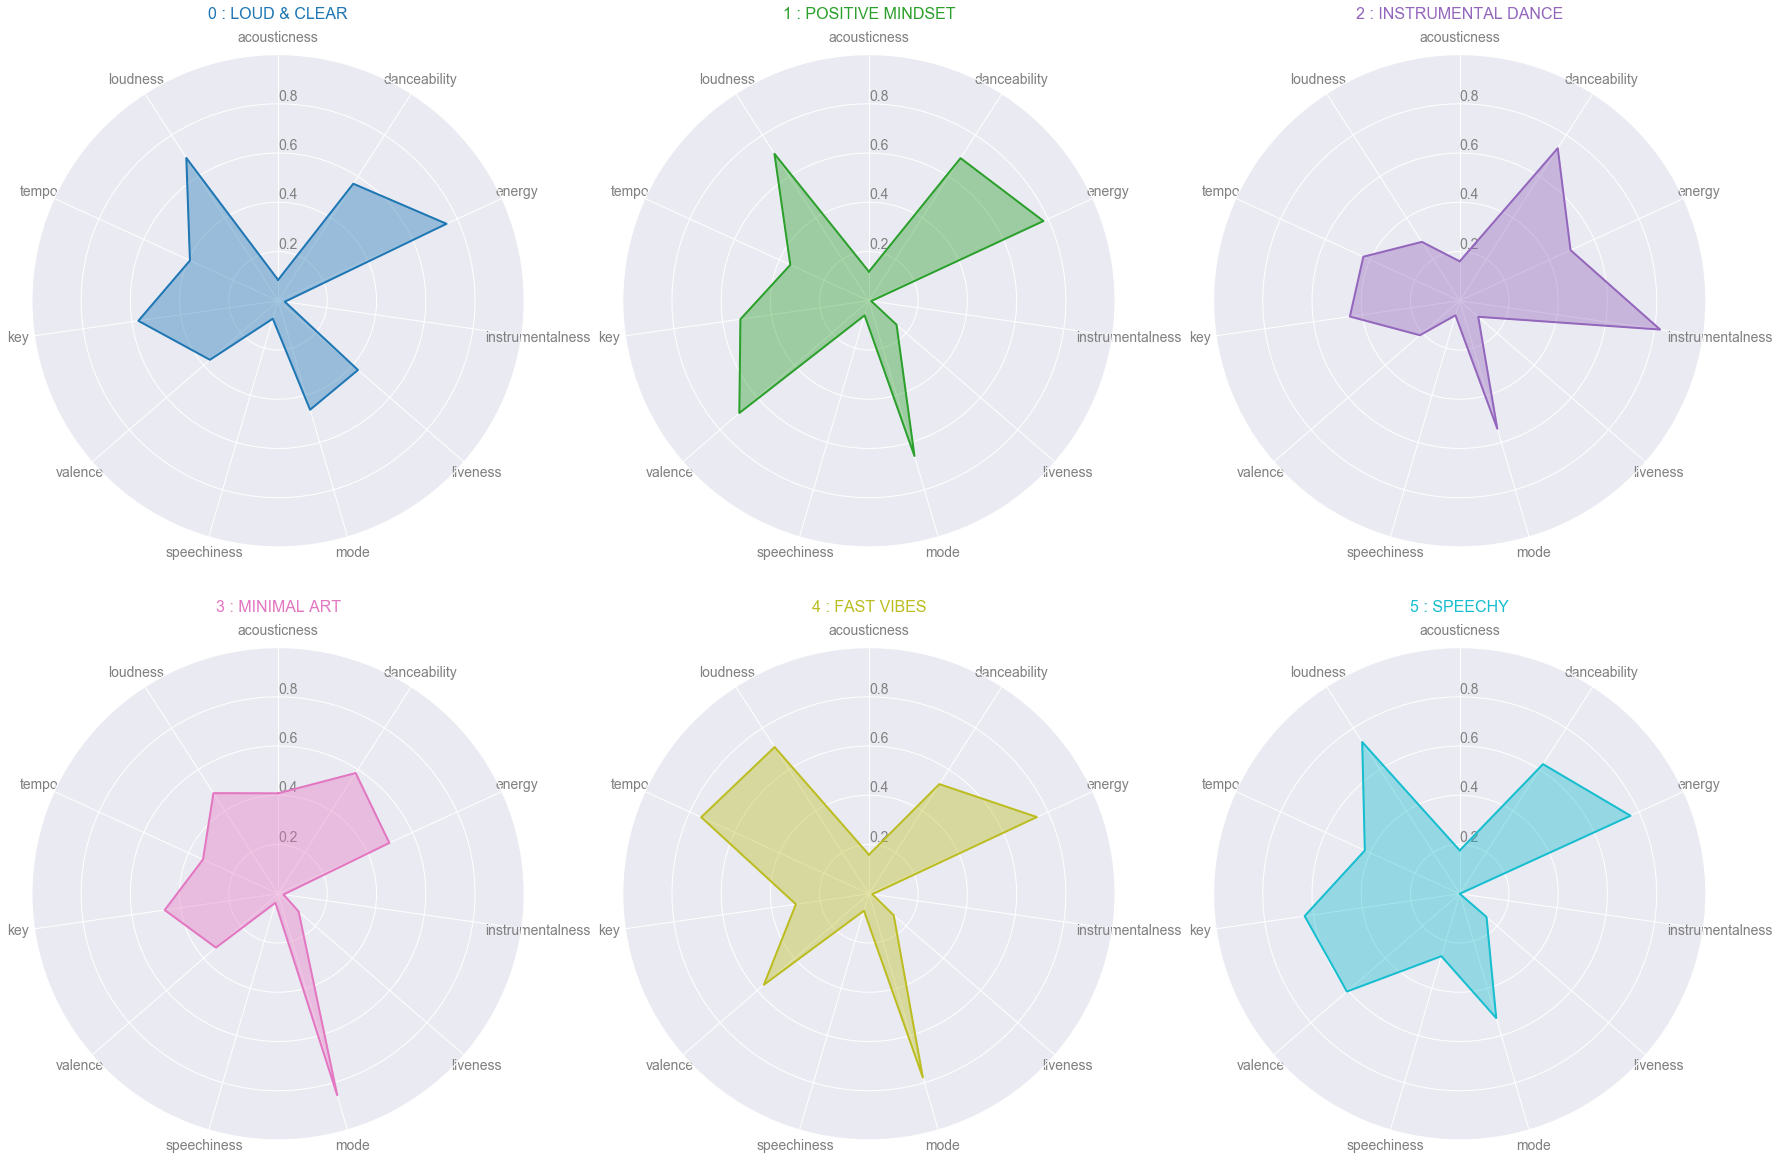

In [15]:
plt.figure(figsize=(30,20))
 
my_palette = plt.cm.get_cmap("tab10", len(df_radar.index))

title_list = ['LOUD & CLEAR', 'POSITIVE MINDSET', 'INSTRUMENTAL DANCE', 'MINIMAL ART', 'FAST VIBES', 'SPEECHY']

for row in range(0, len(df_radar.index)):
    make_radar(row=row, title=str(df_radar['cluster'][row]) + ' : ' + title_list[row],
               color=my_palette(row), dframe=df_radar, num_clusters=len(df_radar.index))

plt.show()